## DATA ANALYSIS AND MACHINE LEARNING PROJECT
## SALARY PREDICTION

## IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import streamlit as st
import joblib

## IMPORTING THE DATASET

In [3]:
HR_Dataset = pd.read_csv("HR Dataset.csv")

## VIEWING THE DATAFRAME

In [4]:
HR_Dataset.head()

,NAME,SALARY,HIRE_DATE,DEPARTMENT_NAME,JOB_ID,JOB_TITLE,LOCATION_ID,CITY,COUNTRY_NAME
0,Steven King,24000,2013-06-17T00:00:00Z,Executive,AD_PRES,President,1700,Seattle,United States of America
1,Neena Yang,17000,2015-09-21T00:00:00Z,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America
2,Lex Garcia,17000,2011-01-13T00:00:00Z,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America
3,Alexander James,9000,2016-01-03T00:00:00Z,IT,IT_PROG,Programmer,1400,Southlake,United States of America
4,Bruce Miller,6000,2017-05-21T00:00:00Z,IT,IT_PROG,Programmer,1400,Southlake,United States of America


## HANDLE MISSING VALUES

In [5]:
print(HR_Dataset.isnull().sum())

NAME               0
SALARY             0
HIRE_DATE          0
DEPARTMENT_NAME    0
JOB_ID             0
JOB_TITLE          0
LOCATION_ID        0
CITY               0
COUNTRY_NAME       0
dtype: int64


There is no missing values in my DataFrame.

## FEATURE ENGINEERING


In [6]:
HR_Dataset['HIRE_DATE'] = pd.to_datetime(HR_Dataset['HIRE_DATE']).dt.tz_localize(None)

Initially, the HIRE_DATE column in the dataset included timezone details. I removed the timezone information to enable accurate calculation of tenure in years from the hire date.

In [7]:
HR_Dataset['HIRE_DATE'] = pd.to_datetime(HR_Dataset['HIRE_DATE'])  
HR_Dataset['TENURE_YEARS'] = (datetime.today() - HR_Dataset['HIRE_DATE']).dt.days // 365

Calculate TENURE_YEARS and add it as a new column in the DataFrame.

In [8]:
HR_Dataset.head()

,NAME,SALARY,HIRE_DATE,DEPARTMENT_NAME,JOB_ID,JOB_TITLE,LOCATION_ID,CITY,COUNTRY_NAME,TENURE_YEARS
0,Steven King,24000,2013-06-17,Executive,AD_PRES,President,1700,Seattle,United States of America,12
1,Neena Yang,17000,2015-09-21,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America,9
2,Lex Garcia,17000,2011-01-13,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America,14
3,Alexander James,9000,2016-01-03,IT,IT_PROG,Programmer,1400,Southlake,United States of America,9
4,Bruce Miller,6000,2017-05-21,IT,IT_PROG,Programmer,1400,Southlake,United States of America,8


In [9]:
HR_Dataset1 = HR_Dataset.copy()
dept_sizes = HR_Dataset['DEPARTMENT_NAME'].value_counts().to_dict()
HR_Dataset1['DEPARTMENT_SIZE'] = HR_Dataset['DEPARTMENT_NAME'].map(dept_sizes)

In [10]:
HR_Dataset1.head()

,NAME,SALARY,HIRE_DATE,DEPARTMENT_NAME,JOB_ID,JOB_TITLE,LOCATION_ID,CITY,COUNTRY_NAME,TENURE_YEARS,DEPARTMENT_SIZE
0,Steven King,24000,2013-06-17,Executive,AD_PRES,President,1700,Seattle,United States of America,12,3
1,Neena Yang,17000,2015-09-21,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America,9,3
2,Lex Garcia,17000,2011-01-13,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America,14,3
3,Alexander James,9000,2016-01-03,IT,IT_PROG,Programmer,1400,Southlake,United States of America,9,5
4,Bruce Miller,6000,2017-05-21,IT,IT_PROG,Programmer,1400,Southlake,United States of America,8,5


I calculated the department size based on the number of employees within each department and included it as a new column in the DataFrame.

In [11]:
HR_Dataset2 = HR_Dataset1.copy()
country_avg = HR_Dataset2.groupby('COUNTRY_NAME')['SALARY'].transform('mean')
HR_Dataset2['COUNTRY_AVG_SALARY'] = country_avg

In [12]:
HR_Dataset2.head()

,NAME,SALARY,HIRE_DATE,DEPARTMENT_NAME,JOB_ID,JOB_TITLE,LOCATION_ID,CITY,COUNTRY_NAME,TENURE_YEARS,DEPARTMENT_SIZE,COUNTRY_AVG_SALARY
0,Steven King,24000,2013-06-17,Executive,AD_PRES,President,1700,Seattle,United States of America,12,3,5064.941176
1,Neena Yang,17000,2015-09-21,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America,9,3,5064.941176
2,Lex Garcia,17000,2011-01-13,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America,14,3,5064.941176
3,Alexander James,9000,2016-01-03,IT,IT_PROG,Programmer,1400,Southlake,United States of America,9,5,5064.941176
4,Bruce Miller,6000,2017-05-21,IT,IT_PROG,Programmer,1400,Southlake,United States of America,8,5,5064.941176


Calculate average salary per country and assign it to each employee row.

In [13]:
HR_Dataset3 = HR_Dataset2.copy()
le = LabelEncoder()
HR_Dataset3['JOB_TITLE_ENCODED'] = le.fit_transform(HR_Dataset3['JOB_TITLE'])
HR_Dataset3['DEPARTMENT_NAME_ENCODED'] = le.fit_transform(HR_Dataset3['DEPARTMENT_NAME'])
HR_Dataset3['COUNTRY_NAME_ENCODED'] = le.fit_transform(HR_Dataset3['COUNTRY_NAME'])

In [14]:
HR_Dataset3.head()

,NAME,SALARY,HIRE_DATE,DEPARTMENT_NAME,JOB_ID,JOB_TITLE,LOCATION_ID,CITY,COUNTRY_NAME,TENURE_YEARS,DEPARTMENT_SIZE,COUNTRY_AVG_SALARY,JOB_TITLE_ENCODED,DEPARTMENT_NAME_ENCODED,COUNTRY_NAME_ENCODED
0,Steven King,24000,2013-06-17,Executive,AD_PRES,President,1700,Seattle,United States of America,12,3,5064.941176,8,2,3
1,Neena Yang,17000,2015-09-21,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America,9,3,5064.941176,3,2,3
2,Lex Garcia,17000,2011-01-13,Executive,AD_VP,Administration Vice President,1700,Seattle,United States of America,14,3,5064.941176,3,2,3
3,Alexander James,9000,2016-01-03,IT,IT_PROG,Programmer,1400,Southlake,United States of America,9,5,5064.941176,9,5,3
4,Bruce Miller,6000,2017-05-21,IT,IT_PROG,Programmer,1400,Southlake,United States of America,8,5,5064.941176,9,5,3


Convert categories to numeric labels (e.g. Analyst = 0, Manager = 1)

In [15]:
HR_Dataset4 = HR_Dataset3.copy()
HR_Dataset4= pd.get_dummies(HR_Dataset4, columns=['JOB_TITLE', 'DEPARTMENT_NAME', 'COUNTRY_NAME'], drop_first=True)

In [16]:
HR_Dataset4.head()

,NAME,SALARY,HIRE_DATE,JOB_ID,LOCATION_ID,CITY,TENURE_YEARS,DEPARTMENT_SIZE,COUNTRY_AVG_SALARY,JOB_TITLE_ENCODED,...,DEPARTMENT_NAME_Human Resources,DEPARTMENT_NAME_IT,DEPARTMENT_NAME_Marketing,DEPARTMENT_NAME_Public Relations,DEPARTMENT_NAME_Purchasing,DEPARTMENT_NAME_Sales,DEPARTMENT_NAME_Shipping,COUNTRY_NAME_Germany,COUNTRY_NAME_United Kingdom of Great Britain and Northern Ireland,COUNTRY_NAME_United States of America
0,Steven King,24000,2013-06-17,AD_PRES,1700,Seattle,12,3,5064.941176,8,...,False,False,False,False,False,False,False,False,False,True
1,Neena Yang,17000,2015-09-21,AD_VP,1700,Seattle,9,3,5064.941176,3,...,False,False,False,False,False,False,False,False,False,True
2,Lex Garcia,17000,2011-01-13,AD_VP,1700,Seattle,14,3,5064.941176,3,...,False,False,False,False,False,False,False,False,False,True
3,Alexander James,9000,2016-01-03,IT_PROG,1400,Southlake,9,5,5064.941176,9,...,False,True,False,False,False,False,False,False,False,True
4,Bruce Miller,6000,2017-05-21,IT_PROG,1400,Southlake,8,5,5064.941176,9,...,False,True,False,False,False,False,False,False,False,True


Create binary columns for each category to avoid order bias.

## EXPLORATORY DATA ANALYSIS (EDA)

In [17]:
HR_Dataset5 = HR_Dataset4.copy()
numerical_cols = HR_Dataset5.select_dtypes(include=np.number).columns

In [18]:
correlation_matrix = HR_Dataset5[numerical_cols].corr()

Calculate correlation matrix

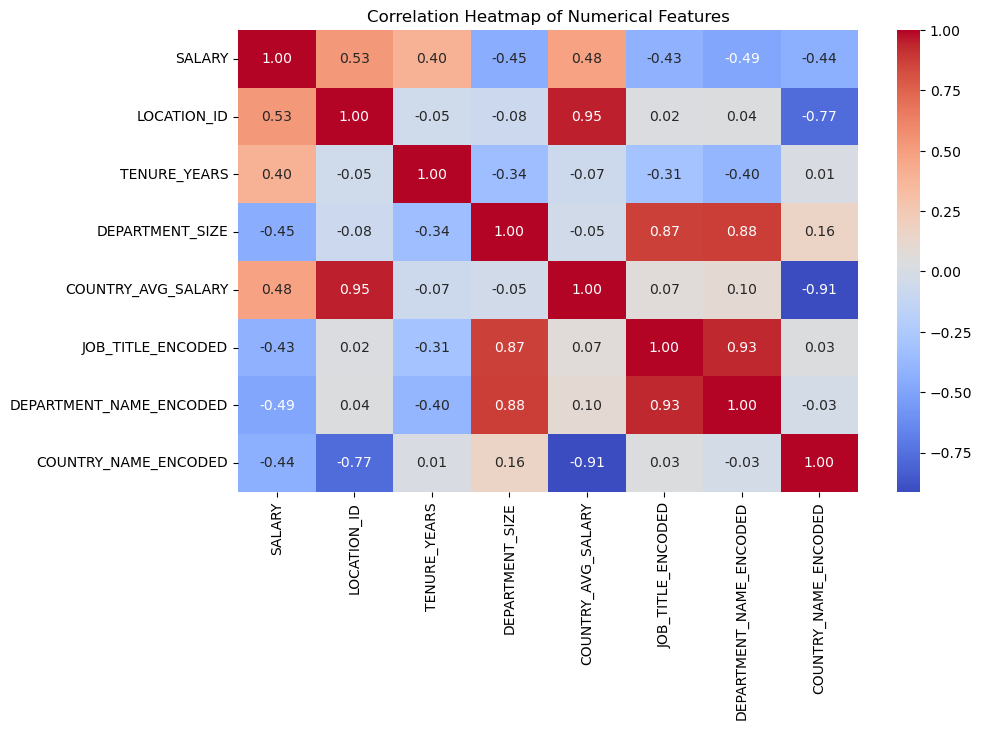

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

I generated a correlation heatmap to analyze the relationships between numerical variables within the dataset. This visualization helps identify features that are strongly correlated, either positively or negatively. Highly correlated features can impact model performance and are useful for feature selection, multicollinearity checks, and gaining deeper insights into the data.


In [20]:
HR_Dataset5.head()

,NAME,SALARY,HIRE_DATE,JOB_ID,LOCATION_ID,CITY,TENURE_YEARS,DEPARTMENT_SIZE,COUNTRY_AVG_SALARY,JOB_TITLE_ENCODED,...,DEPARTMENT_NAME_Human Resources,DEPARTMENT_NAME_IT,DEPARTMENT_NAME_Marketing,DEPARTMENT_NAME_Public Relations,DEPARTMENT_NAME_Purchasing,DEPARTMENT_NAME_Sales,DEPARTMENT_NAME_Shipping,COUNTRY_NAME_Germany,COUNTRY_NAME_United Kingdom of Great Britain and Northern Ireland,COUNTRY_NAME_United States of America
0,Steven King,24000,2013-06-17,AD_PRES,1700,Seattle,12,3,5064.941176,8,...,False,False,False,False,False,False,False,False,False,True
1,Neena Yang,17000,2015-09-21,AD_VP,1700,Seattle,9,3,5064.941176,3,...,False,False,False,False,False,False,False,False,False,True
2,Lex Garcia,17000,2011-01-13,AD_VP,1700,Seattle,14,3,5064.941176,3,...,False,False,False,False,False,False,False,False,False,True
3,Alexander James,9000,2016-01-03,IT_PROG,1400,Southlake,9,5,5064.941176,9,...,False,True,False,False,False,False,False,False,False,True
4,Bruce Miller,6000,2017-05-21,IT_PROG,1400,Southlake,8,5,5064.941176,9,...,False,True,False,False,False,False,False,False,False,True


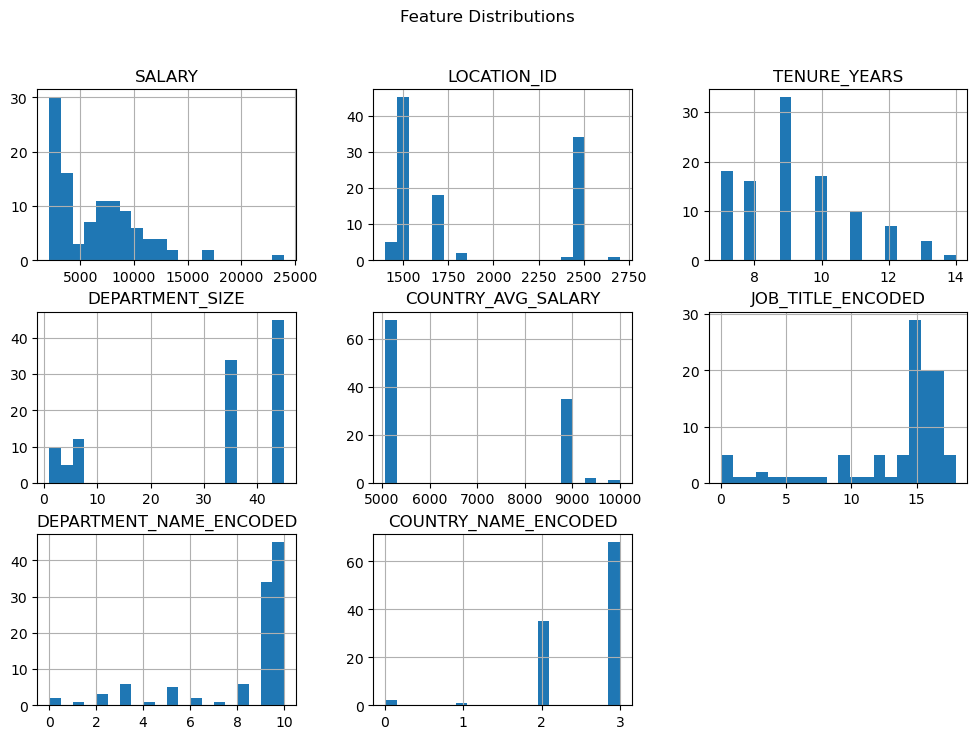

In [21]:
HR_Dataset5[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

I visualized the distribution of all numerical features using histograms. Since the dataset contains 8 numerical columns, the output generated 8 individual histograms to help analyze the spread and shape of each feature's data.

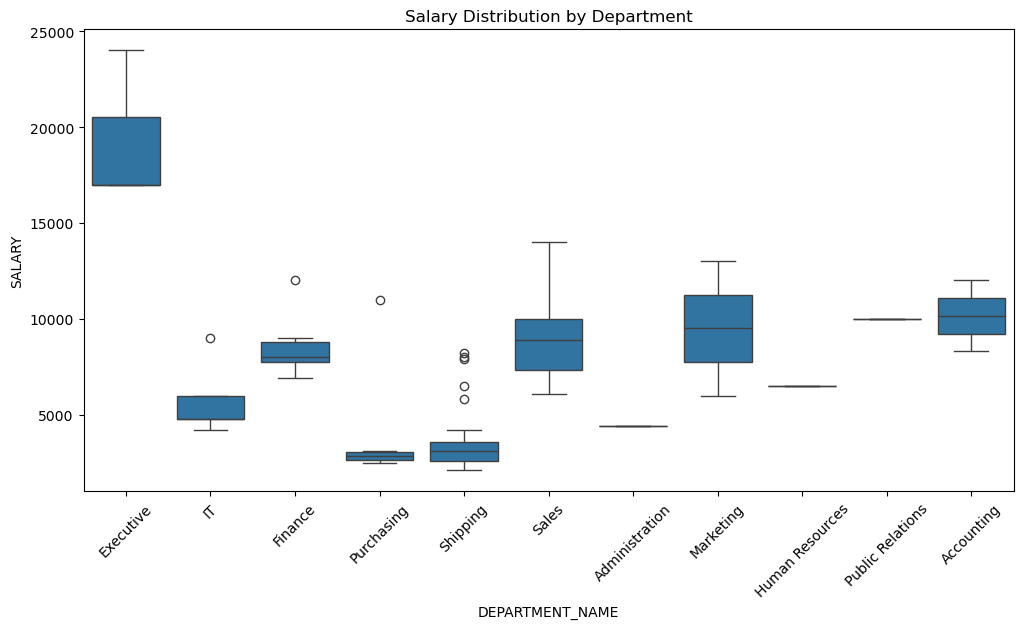

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEPARTMENT_NAME', y='SALARY', data=HR_Dataset3)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Department")
plt.show()

I used a boxplot to visualize salary distribution across different departments. This plot helps to quickly identify differences in salary ranges, medians, and potential outliers within each department.

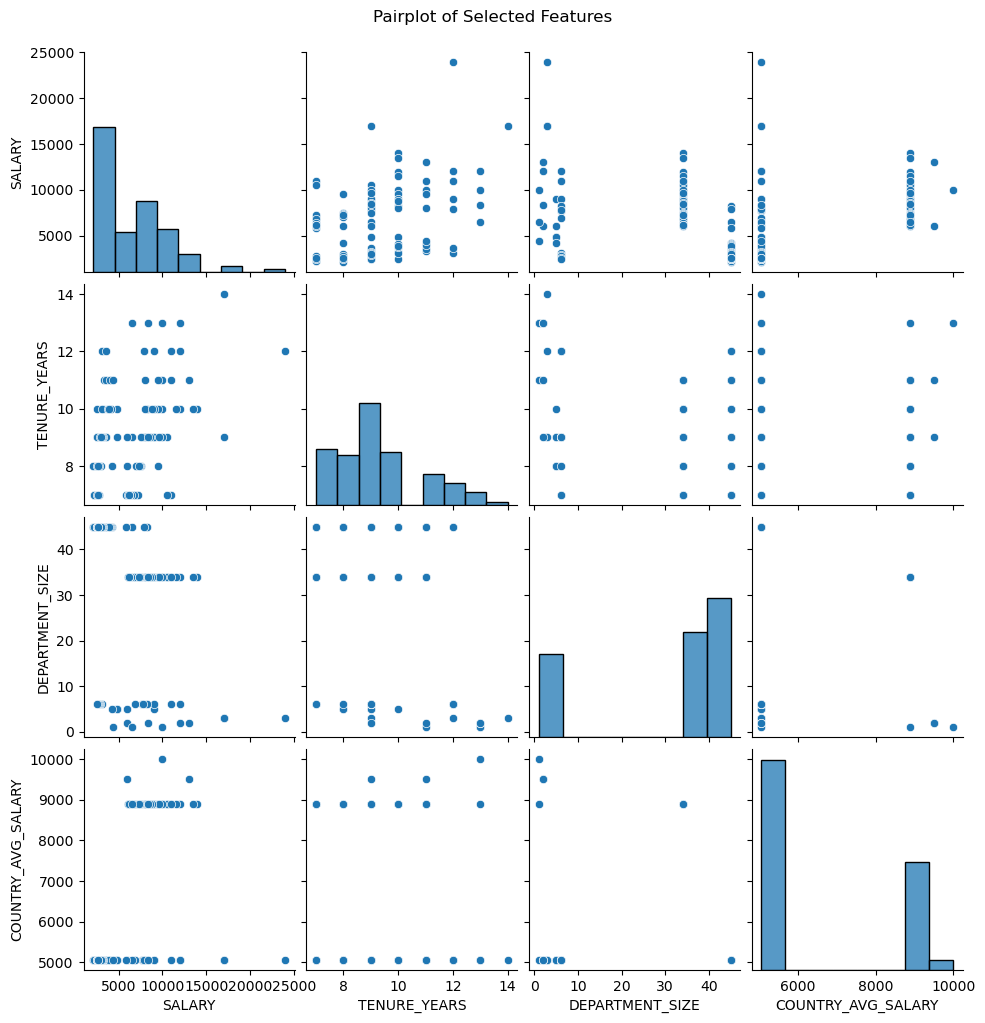

In [23]:
selected_features = ['SALARY', 'TENURE_YEARS', 'DEPARTMENT_SIZE', 'COUNTRY_AVG_SALARY']
sns.pairplot(HR_Dataset5[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

I used a pairplot to visually examine the relationships and distributions among key numerical features such as salary, tenure in years, department size, and country-wise average salary. This technique helps identify trends, correlations, and potential patterns between variables.

## MODEL BUILDING - REGRESSION MODELS

## LINEAR REGRESSION

In [24]:
feature_cols = ['TENURE_YEARS', 'DEPARTMENT_SIZE', 'COUNTRY_AVG_SALARY',
                'JOB_TITLE_ENCODED', 'DEPARTMENT_NAME_ENCODED', 'COUNTRY_NAME_ENCODED']

X = HR_Dataset5[feature_cols]
y = HR_Dataset5['SALARY']

I selected key engineered numerical and encoded categorical features as the input variables for my machine learning model. The target variable chosen was salary, with the goal of building a predictive model to estimate employee salary based on tenure, department size, country salary averages, and job-related encodings.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I split the dataset into training (80%) and testing (20%) sets to train and evaluate the machine learning model effectively. A fixed random state was used to ensure reproducibility of the results.

In [26]:
lr_model = LinearRegression()

In [27]:
lr_model.fit(X_train, y_train)

LinearRegression()

I used the Linear Regression algorithm from scikit-learn to build a salary prediction model. The model was trained on historical data, learning relationships between factors such as tenure, department size, and country salary averages to accurately estimate employee salary.

In [28]:
y_pred = lr_model.predict(X_test)

I used the trained Linear Regression model to predict employee salaries on the unseen test data. These predictions will be compared to the actual salaries to evaluate the model's performance.

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 12483353.28
R² Score: 0.47


The Linear Regression model achieved an R² score of 0.47, indicating it explains approximately 47% of the variance in employee salaries. The Mean Squared Error (MSE) of 12.48 million shows the model's salary predictions deviate significantly on average. While the model captures some salary patterns, further feature engineering or using more advanced models might improve accuracy.

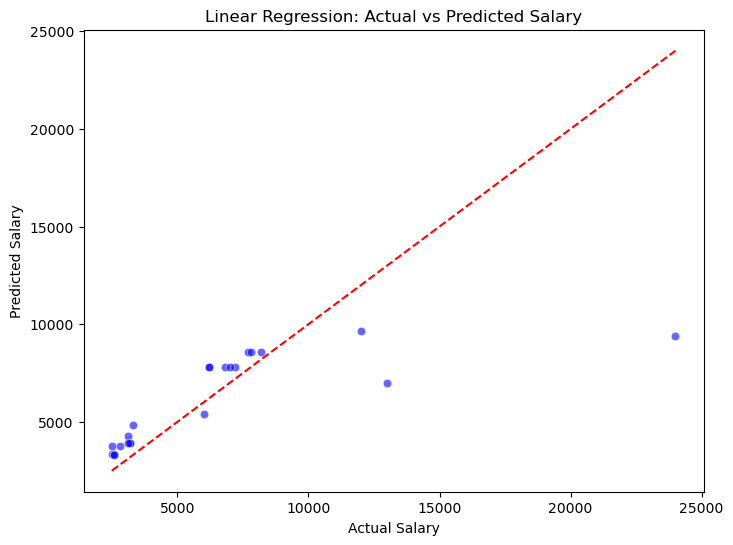

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Linear Regression: Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()

The scatter plot for the Linear Regression model shows a moderate spread of predicted values around the ideal line. While some predictions align well with actual salaries, others show significant deviation, indicating the need for more complex modeling techniques.

## XGBOOST REGRESSION

In [31]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

I implemented an XGBoost regression model to predict employee salaries. XGBoost is a robust machine learning algorithm known for high performance on structured data. I used the squared error objective function for regression, and the model was trained on historical HR data to capture patterns in features like tenure, department size, and job role.

In [32]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=params,
                           scoring='r2',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


I used GridSearchCV to perform hyperparameter tuning on the XGBoost regression model. The search evaluated combinations of parameters like tree depth, number of estimators, learning rate, and subsampling rate. The model with the best R² performance across cross-validation was selected for final evaluation.

In [33]:
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

XGBoost MSE: 11936730.00
XGBoost R² Score: 0.49


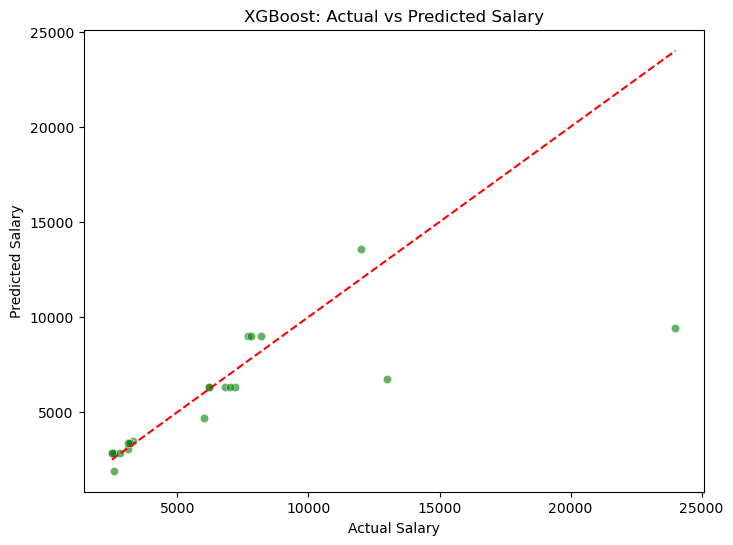

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6, color='green')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("XGBoost: Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

The scatter plot for the XGBoost Regressor displays a modest improvement over Linear Regression. While several predictions lie close to the ideal line, there remains noticeable deviation, suggesting that further tuning or additional features may enhance performance.

## RANDOM FOREST REGRESSION

In [35]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=42)

I implemented a Random Forest Regression model to predict employee salaries. Random Forest aggregates multiple decision trees trained on random subsets of the data, which helps reduce overfitting and improve prediction accuracy. I specified 100 trees with a maximum depth of 7 to maintain a balance between model complexity and generalization.

In [36]:
y_pred_rf = rf_model.predict(X_test)

I used the trained Random Forest model to predict employee salaries on the unseen test dataset. The model aggregates the outputs from 100 decision trees to generate robust and accurate salary predictions.

In [37]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

Random Forest MSE: 10875128.03
Random Forest R² Score: 0.54


The Random Forest model achieved an MSE of approximately 10.9 million and an R² score of 0.54. This means the model explains 54% of the variance in employee salaries and predicts with a lower error than the Linear Regression model. Random Forest captures more complex relationships in the data, making it a better fit for this problem compared to simpler linear models.

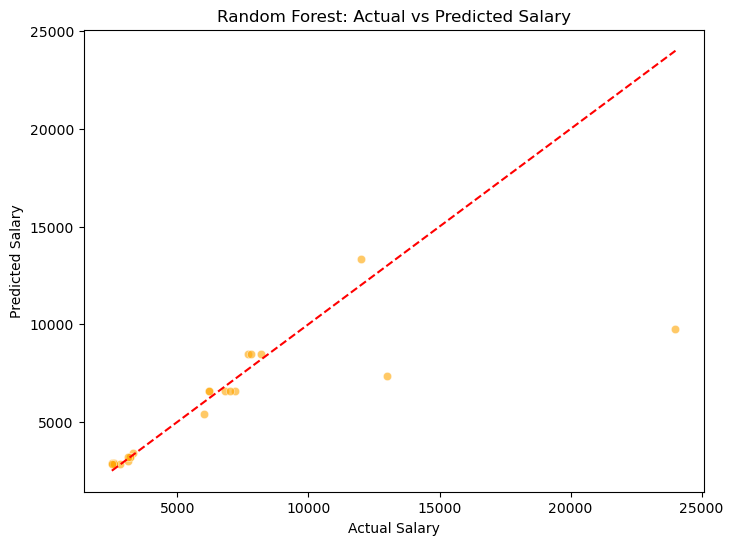

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='orange')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest: Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

The Random Forest scatter plot demonstrates higher prediction accuracy compared to other models. Most data points align closely with the ideal prediction line, suggesting the ensemble trees were effective at learning underlying patterns in salary data.

In [39]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost Regressor', 'Random Forest Regressor'],
    'MSE': [mse, mse_xgb, mse_rf],
    'R² Score': [r2, r2_xgb, r2_rf]
})

print(results)

                     Model           MSE  R² Score
0        Linear Regression  1.248335e+07  0.468894
1        XGBoost Regressor  1.193673e+07  0.492151
2  Random Forest Regressor  1.087513e+07  0.537316


Among the three models tested, Random Forest Regressor performed the best, achieving the lowest Mean Squared Error (10.8M) and the highest R² score (0.54). This indicates it captured the underlying patterns in the data more effectively than both Linear Regression and XGBoost. While XGBoost showed slight improvement over Linear Regression, Random Forest delivered the most reliable salary predictions overall.

In [40]:
# Save the random forest model (or best performing one)
joblib.dump(rf_model, 'salary_predictor.pkl')


['salary_predictor.pkl']